2: Implementing Feedforward neural networks with Keras and TensorFlow
<br>
a. Import the necessary packages
<br>
b. Load the training and testing data (MNIST/CIFAR10)
<br>
c. Define the network architecture using Keras
<br>
d. Train the model using SGD
<br>
e. Evaluate the network
<br>
f. Plot the training loss and accuracy
<br>

**datasets: MNIST, CIFER10**

#### a. Import the necessary packages

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

#### b. Load the training and testing data (MNIST/CIFAR10)

#### Note: Decrease batch size and remove some layers if epoch takes to much time to run

In [5]:
train_data_dir = 'Datasets/mnist-jpg/train'
test_data_dir = 'Datasets/mnist-jpg/test'

# Image data generator for training data
train_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Image data generator for testing data
test_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Create data generators
train_batch_size = 10000
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),  # Resize images to 28x28
    batch_size=train_batch_size,
    class_mode='categorical', 
     color_mode='grayscale',# Use 'categorical' for one-hot encoded labels
    shuffle=True,
)

# Load test data without labels (class_mode=None)
test_batch_size = 2000
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(28, 28),  # Resize images to 28x28
    batch_size=test_batch_size,
    class_mode='categorical',  # Use 'categorical' for one-hot encoded labels
      color_mode='grayscale',
    shuffle=True,
)

Found 60000 images belonging to 10 classes.
Found 60000 images belonging to 10 classes.


#### Selecting first batch containing 10000 images 

In [7]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

#### c. Define the network architecture using Keras

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

#### d. Train the model using SGD

In [9]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))

Epoch 1/8
313/313 [==============================] - 1s 2ms/step - loss: 1.4472 - accuracy: 0.6491 - val_loss: 0.9191 - val_accuracy: 0.7970
Epoch 2/8
313/313 [==============================] - 0s 1ms/step - loss: 0.7130 - accuracy: 0.8391 - val_loss: 0.6169 - val_accuracy: 0.8440
Epoch 3/8
313/313 [==============================] - 0s 1ms/step - loss: 0.5358 - accuracy: 0.8648 - val_loss: 0.5122 - val_accuracy: 0.8595
Epoch 4/8
313/313 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.8774 - val_loss: 0.4540 - val_accuracy: 0.8785
Epoch 5/8
313/313 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8858 - val_loss: 0.4237 - val_accuracy: 0.8805
Epoch 6/8
313/313 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8928 - val_loss: 0.3954 - val_accuracy: 0.8950
Epoch 7/8
313/313 [==============================] - 0s 1ms/step - loss: 0.3642 - accuracy: 0.8976 - val_loss: 0.3749 - val_accuracy: 0.8960
Epoch 8/8
313

#### e. Evaluate the network

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

63/63 [==============================] - 0s 988us/step - loss: 0.3610 - accuracy: 0.8990
Loss:  0.3610372841358185
Accuracy:  0.8989999890327454


63/63 [==============================] - 0s 828us/step
Actual Number:  8
Predicted Number:  8


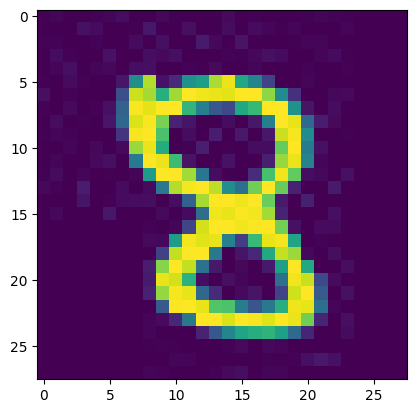

In [11]:
n = 20 
plt.imshow(x_test[n])
predicted_value = model.predict(x_test)
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))

#### f. Plot the training loss and accuracy

In [12]:
history = history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

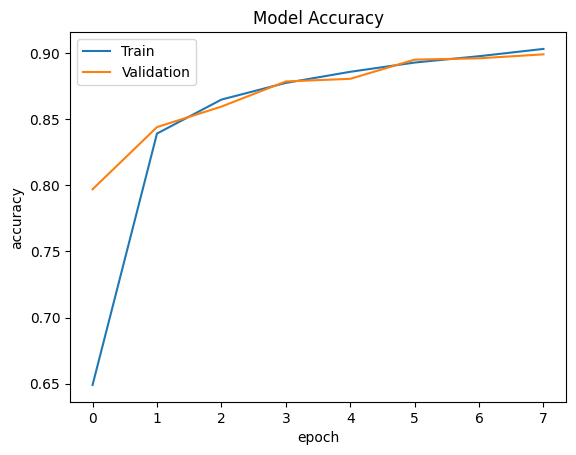

In [13]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', "Validation"], loc='upper left')

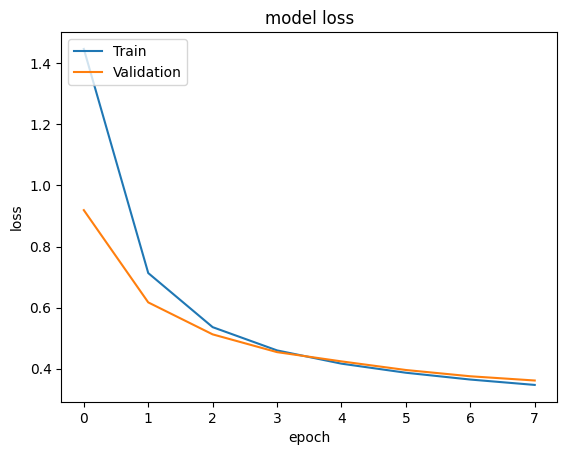

In [14]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

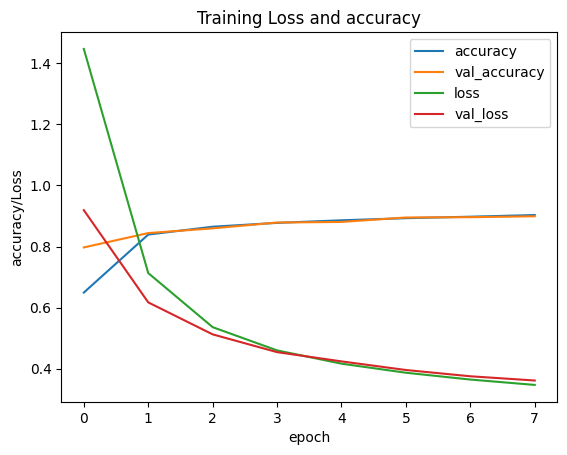

In [15]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])